<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>15.RANDOM FOREST</b></u>
</div>

<div style="text-align: center; font-size: 30px; color: Violet;">
    <u><b>Use the Glass dataset and apply the Random forest model.</b></u>
</div>

## Objective:
To apply Random Forest and ensemble learning techniques on the Glass dataset by performing data analysis, preprocessing, handling class imbalance, and evaluating model performance using appropriate classification metrics.

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from imblearn.over_sampling import SMOTE

In [11]:
#2.Load Dataset
df=pd.read_excel("glass.xlsx",sheet_name="glass")


In [12]:
#3.Exploratory Data Analysis
print("First 5 rows:",df.head())
print("Dataset Info:")
print(df.info())
print("Statistical summary:",df.describe())
print("Missing values:",df.isnull().sum())

First 5 rows:         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memo

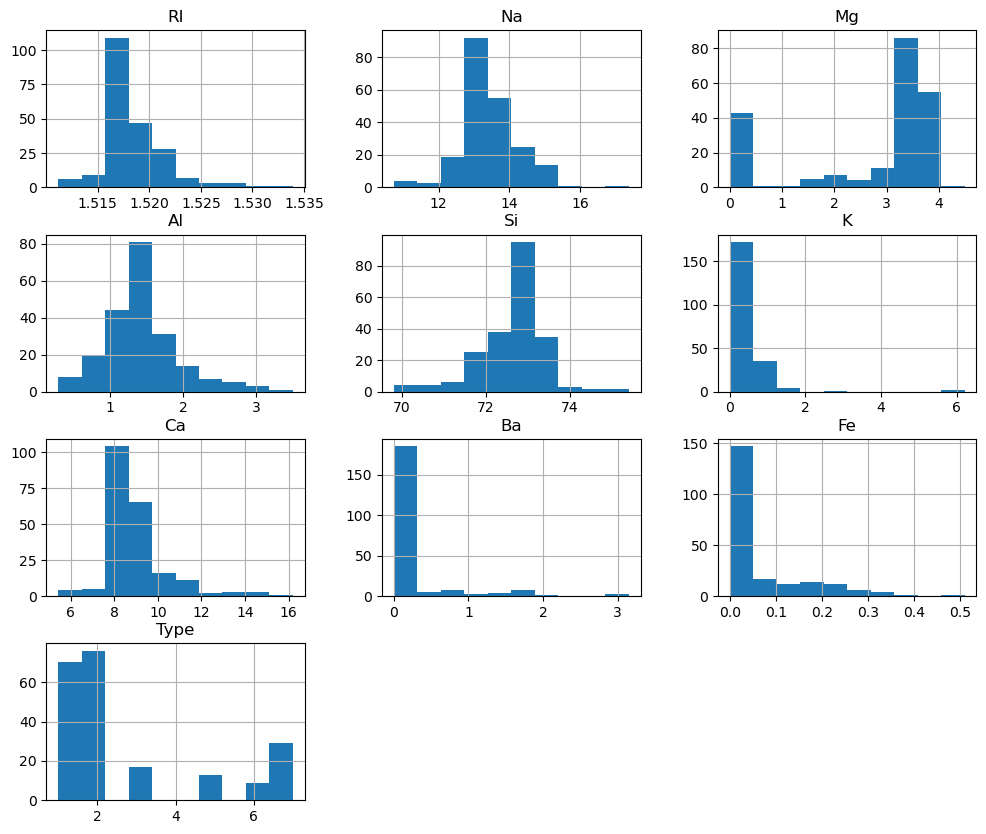

In [13]:
#4.Data Visualisation
#Histogram
df.hist(figsize=(12,10))
plt.show()

In [14]:
#Boxplot
plt.figure(figsize=(12,10))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x1000 with 0 Axes>

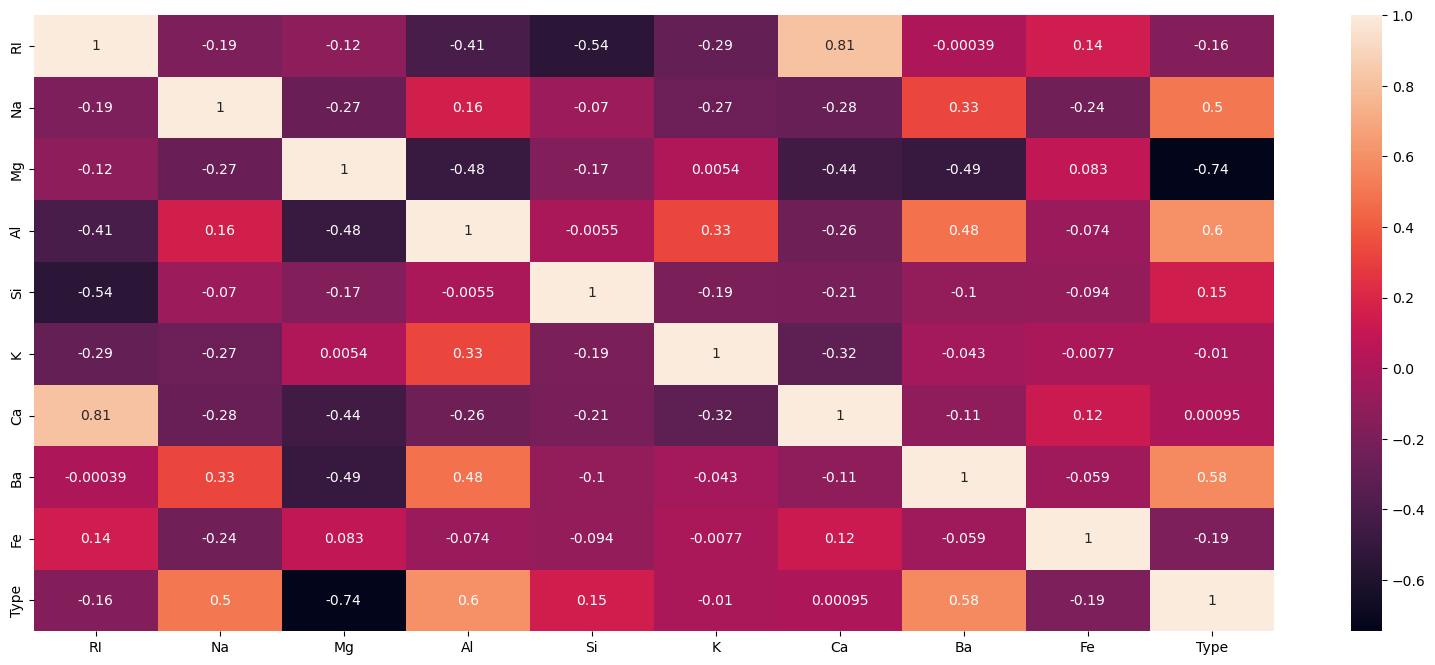

In [15]:
#Correlation Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
#5.Data Preprocessing
#Split features and target
x=df.drop("Type",axis=1)
y=df["Type"]

In [17]:
#Feature Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
#Handle Imbalanced Data using SMOTE
smote=SMOTE(random_state=42)
x_resampled,y_resampled=smote.fit_resample(x_scaled,y)


In [21]:
#Train_test split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42)

In [22]:
#6.Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)

rf_pred=rf.predict(x_test)

In [23]:
print("\nRANDOM FOREST RESULTS")
print("accuracy:",accuracy_score(y_test,rf_pred))
print("Classification Report:",classification_report(y_test,rf_pred))
print("Confusion Matrix:",confusion_matrix(y_test,rf_pred))


RANDOM FOREST RESULTS
accuracy: 0.9239130434782609
Classification Report:               precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92

Confusion Matrix: [[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


In [26]:
#7.Bagging Classifier
bagging=BaggingClassifier(n_estimators=100,random_state=42)
bagging.fit(x_train,y_train)

bag_pred=bagging.predict(x_test)

print("Bagging Result")
print("Accuracy:",accuracy_score(y_test,bag_pred))


Bagging Result
Accuracy: 0.9347826086956522


In [28]:
#8.Boosting (AdaBoost)
boosting=AdaBoostClassifier(n_estimators=100,random_state=42)
boosting.fit(x_train,y_train)

boost_pred=boosting.predict(x_test)

print("Boosting Results")
print("Accuracy:", accuracy_score(y_test,boost_pred))

Boosting Results
Accuracy: 0.532608695652174


# Bagging and Boosting Methods

## Bagging (Bootstrap Aggregating)

Definition:
Bagging is an ensemble learning method where multiple models are trained independently on different random samples of the dataset, and their predictions are combined.

How it works:
Create multiple bootstrap samples (random sampling with replacement)

Train a separate model on each sample

Combine predictions using majority voting (classification) or averaging (regression)

Purpose: Reduces variance and overfitting
Example:Random Forest is a bagging-based algorithm.

## Boosting

Definition:
Boosting is an ensemble method where models are trained sequentially, and each new model focuses more on the previous model’s errors.

How it works:
Train first weak learner

Increase weight of misclassified data

Train next learner to correct those errors

Combine all learners to make final prediction

Purpose:Reduces bias and improves accuracy

Example:AdaBoost, Gradient Boosting, XGBoost


### Difference Between Bagging and Boosting
| Feature       | Bagging            | Boosting          |
| ------------- | ------------------ | ----------------- |
| Training      | Parallel           | Sequential        |
| Focus         | Reduce variance    | Reduce bias       |
| Data sampling | Random sampling    | Weighted sampling |
| Overfitting   | Reduced            | Can increase      |
| Dependency    | Independent models | Dependent models  |

# Handling Imbalanced Data
What is Imbalanced Data?

When some classes have many more samples than others.

Example:

Class A → 90%

Class B → 10%

This causes the model to favor the majority class.

Techniques to Handle Imbalanced Data
1. Oversampling

Increase minority class samples.

Example: SMOTE (Synthetic Minority Over-sampling Technique)

Creates synthetic data points instead of duplicating

2. Undersampling

Reduce majority class samples.

Removes some data from majority class

Risk: Loss of information

3. Class Weight Adjustment

Assign higher weight to minority classes

Penalizes wrong predictions more

4. Evaluation Metrics

Avoid accuracy alone.

Use:

Precision

Recall

F1-Score

Confusion Matrix